In [ ]:
import tensorflow as tf 
print(tf.__version__)

2.12.0


In [ ]:
import keras
keras.__version__

'2.12.0'

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
train=pd.read_table('train.txt', delimiter = ';', header=None, )
val=pd.read_table('val.txt', delimiter = ';', header=None, )
test=pd.read_table('test.txt', delimiter = ';', header=None, )

data = pd.concat([train ,  val , test])
data.columns = ["text", "label"]

In [ ]:
data.shape

(20000, 2)

In [ ]:
data.isna().any(axis=1).sum()

0

In [ ]:
#text preprocessing
ps = PorterStemmer()

def preprocess(line):
    review = re.sub('[^a-zA-Z]', ' ', line) #leave only characters from a to z
    review = review.lower() #lower the text
    review = review.split() #turn string into list of words
    #apply Stemming 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #delete stop words like I, and ,OR   review = ' '.join(review)
    #trun list into sentences
    return " ".join(review)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data['text']=data['text'].apply(lambda x: preprocess(x))

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['N_label'] = label_encoder.fit_transform(data['label'])

In [ ]:
data['text']

0                                       didnt feel humili
1       go feel hopeless damn hope around someon care ...
2                    im grab minut post feel greedi wrong
3          ever feel nostalg fireplac know still properti
4                                            feel grouchi
                              ...                        
1995    keep feel like someon unkind wrong think get b...
1996              im feel littl cranki neg doctor appoint
1997                feel use peopl give great feel achiev
1998    im feel comfort derbi feel though start step s...
1999    feel weird meet w peopl text like dont talk fa...
Name: text, Length: 20000, dtype: object

In [ ]:
# Creating the Bag of Words model by applying Countvectorizer -convert textual data to numerical data


from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))#example: the course was long-> [the,the course,the course was,course, course was, course was long,...]

data_cv = cv.fit_transform(data['text']).toarray()

In [ ]:
data_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(data_cv, data['N_label'], test_size=0.25, random_state=42)

In [ ]:
# first neural network with keras tutorial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
# split into input (X) and output (y) variables
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='softmax'))
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=10, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 1.0007 - accuracy: 0.6417
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3057 - accuracy: 0.9017
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1703 - accuracy: 0.9441
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1132 - accuracy: 0.9623
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0787 - accuracy: 0.9753
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0571 - accuracy: 0.9830
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0404 - accuracy: 0.9878
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0317 - accuracy: 0.9899
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0263 - accuracy: 0.9917
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0129 

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

157/157 [==============================] - 0s 3ms/step - loss: 0.8289 - accuracy: 0.8476
Accuracy: 84.76


157/157 [==============================] - 1s 5ms/step


Text(0.5, 1.0, 'Confusion Matrix')

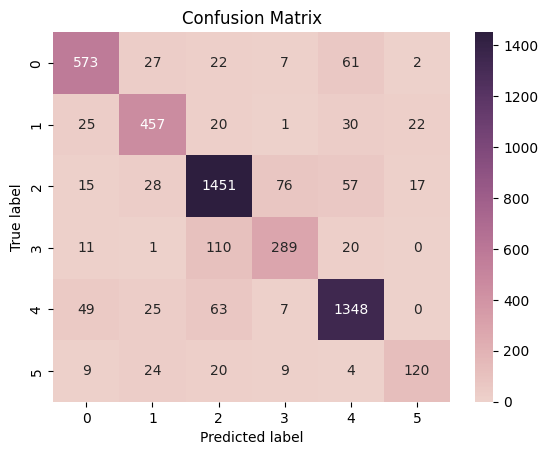

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=-1)
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define color map
cmap = sns.cubehelix_palette(as_cmap=True)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)

# Add labels and title
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")


In [ ]:
import numpy as np


In [ ]:
text='I feel sad'
text=preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 [==============================] - 0s 23ms/step


'sadness'

In [ ]:
tf.keras.models.save_model(model,'my_model.h5')

In [ ]:
import pickle
pickle.dump(label_encoder, open('encoder.pkl', 'wb'))
pickle.dump(cv, open('CountVectorizer.pkl', 'wb'))

In [ ]:
#text preprocessing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
def preprocess(line):
    ps = PorterStemmer()

    review = re.sub('[^a-zA-Z]', ' ', line) #leave only characters from a to z
    review = review.lower() #lower the text
    review = review.split() #turn string into list of words
    #apply Stemming 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #delete stop words like I, and ,OR   review = ' '.join(review)
    #trun list into sentences
    return " ".join(review)